First things first, let's set up the notebook for our exercise today.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Constants / Global Settings
SampleRate = 256 # Amount of samples the muse records per second
plt.rcParams["figure.figsize"] = [20.00, 5.00] # Makes the plot a little wider for us to see

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1: Open and format the data

In [27]:
channel = []

with open("/content/drive/MyDrive/Colab Notebooks/CUCOH Workshop Demo/eo.csv", "r") as data:
    for line in data:
        # Format the line
        line = line.split(",")           # Convert to a list
        channel.append(float(line[0]))   # Just record the 1st channel


######################
## this is a good place to do a code along with lots of prints
######################

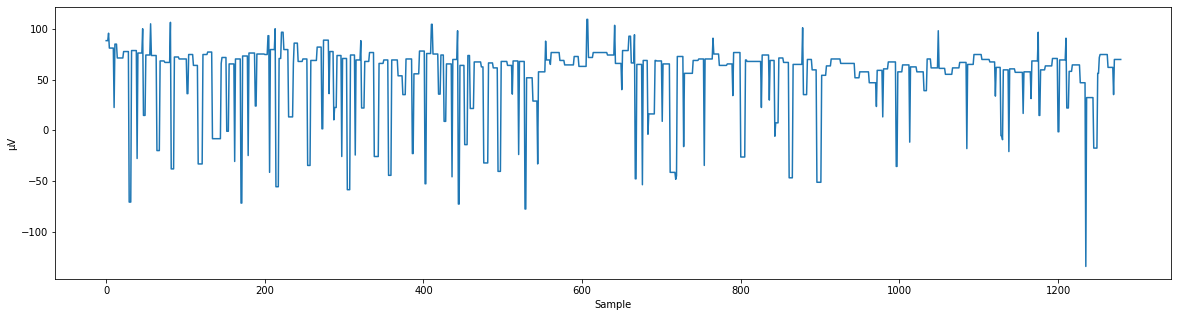

<Figure size 1440x360 with 0 Axes>

In [28]:
# Plot the data
time = np.arange(0, len(channel), 1)

plt.plot(time, channel)
plt.xlabel("Sample")
plt.ylabel("μV")
plt.show()
plt.clf()

2: Fast Fourier Transform the data

In [29]:
# Fourier transform
fftData = np.fft.fft(channel)
freq = np.fft.fftfreq(len(channel)) * SampleRate

# Now we just plot the transformed data (in the frequency domain)
plotFftData = fftData[1:int(len(fftData)/2)]
plotMag     = plotFftData.real**2 + plotFftData.imag**2 # FFT is a complex function, so we need to cast to the real domain
plotFreq    = freq[1:int(len(freq)/2)]                  # Remove negative reflection

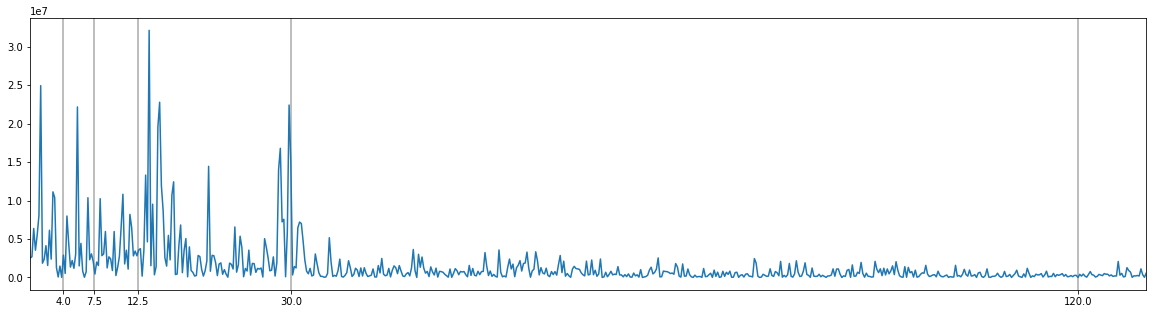

<Figure size 1440x360 with 0 Axes>

In [30]:
isShowingBinLines = True

# Create the plot
fig = plt.figure()
ax = fig.add_subplot()

# Add the special spacing
if(isShowingBinLines):
  subsets=[0, 4, 7.5, 12.5, 30, 120]
  ax.set_xticks(subsets)

# Add the vertical lines
if(isShowingBinLines):
  plt.axvline(x=4, color="darkgrey")
  plt.axvline(x=7.5, color="darkgrey")
  plt.axvline(x=12.5, color="darkgrey")
  plt.axvline(x=30, color="darkgrey")
  plt.axvline(x=120, color="darkgrey")

# Plot
ax.margins(x=0)
ax.plot(plotFreq, plotMag)
plt.show()
plt.clf()


3: Sort into power bins

In [31]:
# Bin the results
binsAverage = [0,0,0,0,0] # We will append to this later
binsTotal   = [0,0,0,0,0]
binsCount   = [0,0,0,0,0]

for point in range(len(plotFreq)):
  frequency = plotFreq[point]

  if(frequency < 4):      # Delta (0 - 4Hz)
    binsTotal[0] += plotMag[point]
    binsCount[0] += 1

  elif(frequency < 7.5):  # Theta (4 - 7.5Hz)
    binsTotal[1] += plotMag[point]
    binsCount[1] += 1

  elif(frequency < 12.5): # Alpha (7.5 - 12.5Hz)
    binsTotal[2] += plotMag[point]
    binsCount[2] += 1

  elif(frequency < 30):   # Beta  (12.5 - 30Hz)
    binsTotal[3] += plotMag[point]
    binsCount[3] += 1

  elif(frequency < 120):   # Gamma (30 - 120Hz)
    binsTotal[4] += plotMag[point]
    binsCount[4] += 1

# Compute the average for all of them
binsAverage = list(np.array(binsTotal)/np.array(binsCount))

print(binsTotal)
print(binsCount)
print(binsAverage)

[96416510.12297195, 71208111.56872103, 91107309.77430476, 366086057.34551173, 323381713.386402]
[19, 18, 25, 87, 450]
[5074553.164366945, 3956006.1982622794, 3644292.3909721905, 4207885.716615077, 718626.02974756]


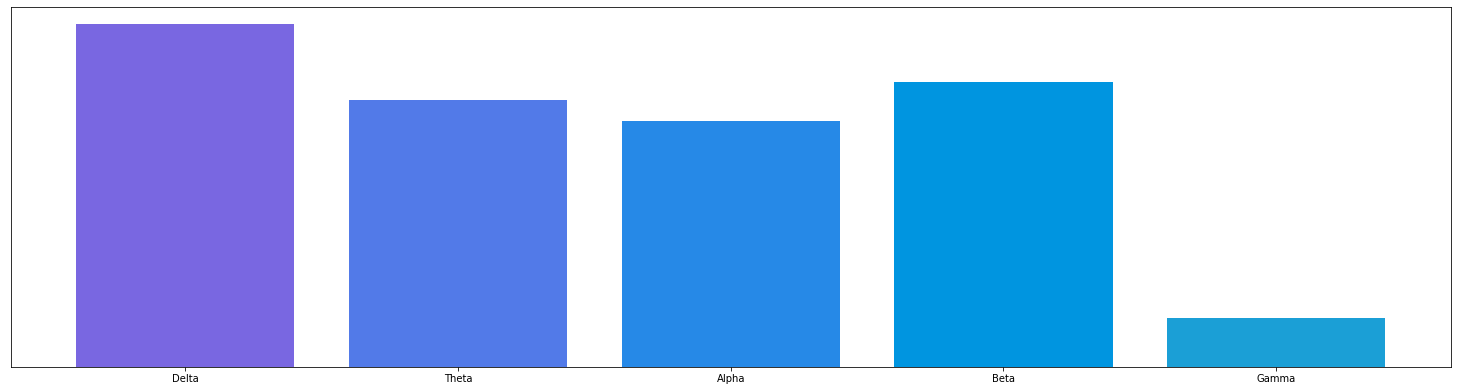

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.get_yaxis().set_visible(False)

binNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
ax.bar(binNames, binsAverage, color=['#7967e1', '#527ae8', '#2689e7', '#0095e0', '#1b9fd6'])
plt.show()

Make a function so that we can easily input filenames for opening, fft, and binning

have an option for showing plots

In [33]:
def getPowerBinsFromFilename(filename):
  if(str(type(filename)) != "<class 'str'>"): # Error handling
    print("Error: filename must be a string.")
    return


  ## Open the data ##
  channel = []
  with open(filename, "r") as data:
    for line in data:
        line = line.split(",")
        channel.append(float(line[0]))


  ## Fourier transform the data ##
  fftData = np.fft.fft(channel)
  freq = np.fft.fftfreq(len(channel)) * SampleRate

  outFftData = fftData[1:int(len(fftData)/2)]
  outMag     = outFftData.real**2 + outFftData.imag**2
  outFreq    = freq[1:int(len(freq)/2)]


  ## Bin the data ##
  binsTotal   = [0,0,0,0,0]
  binsCount   = [0,0,0,0,0]

  for point in range(len(outFreq)):
    frequency = outFreq[point]

    if(frequency < 4):      # Delta (0 - 4Hz)
      binsTotal[0] += outMag[point]
      binsCount[0] += 1

    elif(frequency < 7.5):  # Theta (4 - 7.5Hz)
      binsTotal[1] += outMag[point]
      binsCount[1] += 1

    elif(frequency < 12.5): # Alpha (7.5 - 12.5Hz)
      binsTotal[2] += outMag[point]
      binsCount[2] += 1

    elif(frequency < 30):   # Beta  (12.5 - 30Hz)
      binsTotal[3] += outMag[point]
      binsCount[3] += 1

    elif(frequency < 120):   # Gamma (30 - 120Hz)
      binsTotal[4] += outMag[point]
      binsCount[4] += 1

  binsAverage = list(np.array(binsTotal)/np.array(binsCount))
  
  
  ## Finished computing the bins, return them ##
  return binsAverage



def showPlot(values, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title(title, loc='left')
    ax.get_yaxis().set_visible(False)

    binNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    ax.bar(binNames, binsAverage, color=['#7967e1', '#527ae8', '#2689e7', '#0095e0', '#1b9fd6'])
    plt.show()



def showComparisonPlot(values):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title("Comparison", loc='left')
    ax.get_yaxis().set_visible(False)

    binNames = ['Sample A', 'Sample B']
    ax.bar(binNames, values, color=['#7967e1', '#1b9fd6'])
    plt.show()

4: Make classification based on the power bin magnitudes

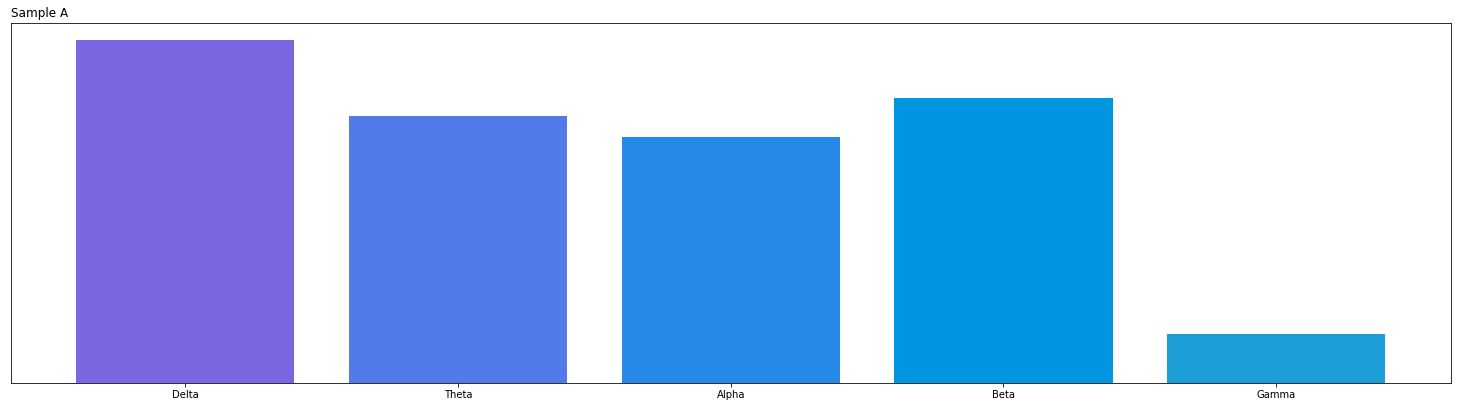

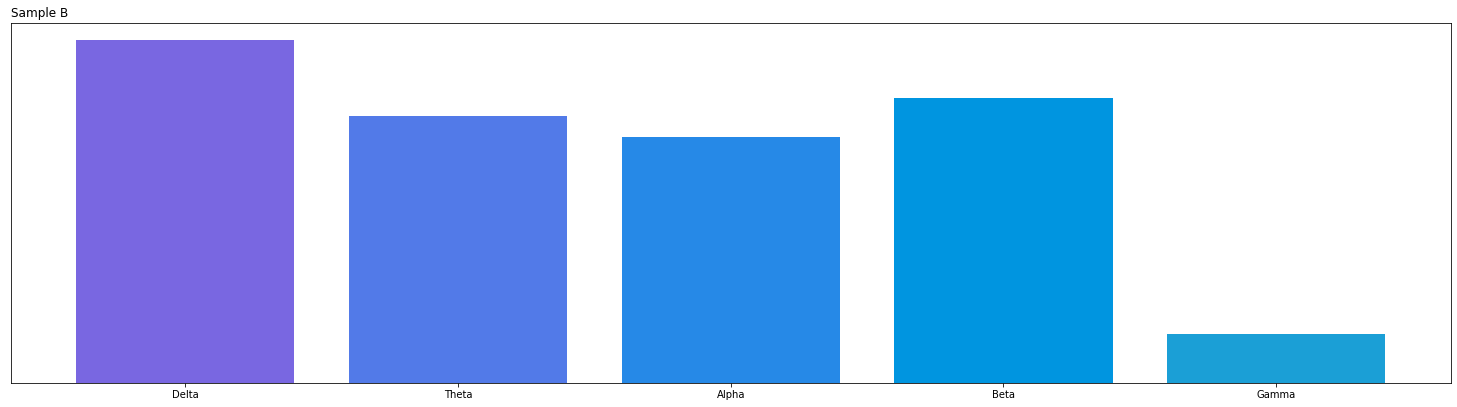

Raw Alpha: 3644292.3909721905 259951.65320908598
Scaled Alpha: 3644292.3909721905 3880051.339600641
Scale Factor: 14.926049870049539


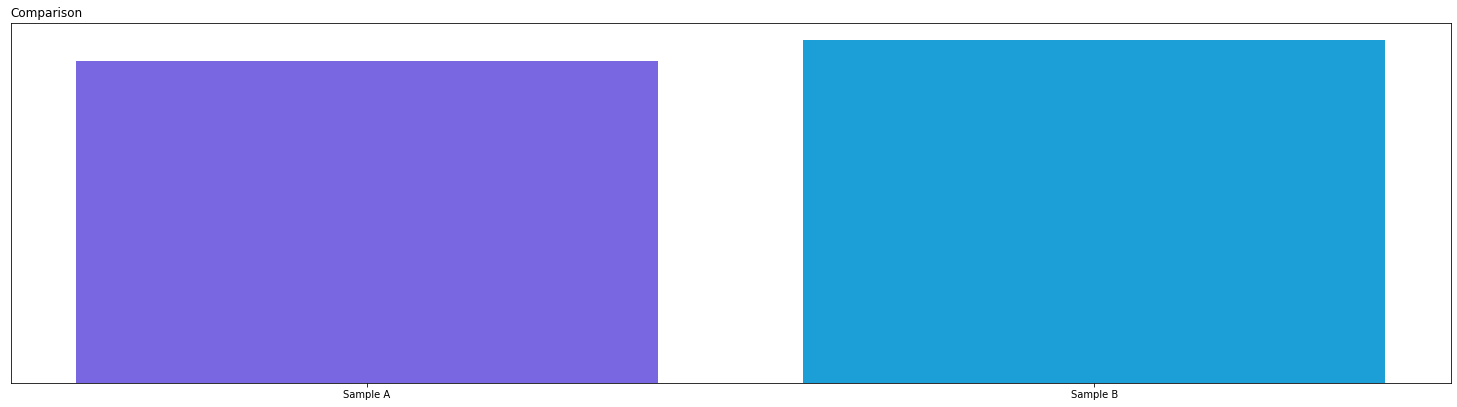



Sample A: Eyes Open
Sample B: Eyes Closed


In [35]:
# Use our function to compute the bins
binsA = getPowerBinsFromFilename('/content/drive/MyDrive/Colab Notebooks/CUCOH Workshop Demo/eo.csv')
binsB = getPowerBinsFromFilename('/content/drive/MyDrive/Colab Notebooks/CUCOH Workshop Demo/ec.csv')


# Plot out the bins calculated
showPlot(binsA, "Sample A")
showPlot(binsB, "Sample B")


# Grab the raw alpha bins (index = 2 is the alpha)
alphaBinA = binsA[2]
alphaBinB = binsB[2]

# Use the average magnitude of all bins to scale the output for fair comparison
scaleFactor = np.average(binsA) / np.average(binsB)
scaledAlphaBinA = alphaBinA
scaledAlphaBinB = alphaBinB * scaleFactor # only scale B since the scale factor is relative to A

# Output the before and after scaling
print()
print("Raw Alpha:", alphaBinA, alphaBinB)
print("Scaled Alpha:", scaledAlphaBinA, scaledAlphaBinB)
print("Scale Factor:", scaleFactor)
print()

# Show comparison plot after scaling relative to all bins
showComparisonPlot([scaledAlphaBinA, scaledAlphaBinB])


print("\n=============================\n")


# Bin A's alpha bin is stronger => Sample A is Eyes Closed
if(scaledAlphaBinA > scaledAlphaBinB):
  print("Sample A: Eyes Closed")
  print("Sample B: Eyes Open")
else:
  print("Sample A: Eyes Open")
  print("Sample B: Eyes Closed")
